# Gaussian Naive Bayes (GNB) for Classification  
### DATA 2060 — Final Project  
### Team Members: Axle Zhao, Jiaqi Zhang, Ghirish Thaenraj
### GitHub Repo: git@github.com:axlezhao/Final-Project---gaussian-naive-bayes-.git


# 1. Overview of Gaussian Naive Bayes

Gaussian Naive Bayes (GNB) is a probabilistic classification algorithm rooted in Bayes' Theorem. It is a member of the generative learning family, meaning it models the distribution of inputs for a given class rather than learning a direct decision boundary. GNB is distinctive because it assumes that continuous features follow a Gaussian (Normal) distribution. Despite its simplified assumptions, it remains a competitive baseline for tasks ranging from medical diagnosis to document classification and spam filtering [1](Murphy, 2006; scikit-learn developers, 2025).

# Math
### 1.1 Bayes Rule
The fundamental principle of the algorithm is Bayes' Rule, which describes how to
update our belief about an unknown label $y$ after observing data $x$. In general,
Bayes' Rule is written as:

$$
P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)},
$$

where: $P(y)$ is the prior probability of class $y$, $P(x \mid y)$ is the likelihood
of observing $x$ given $y$, $P(x)$ is the evidence (a normalizing constant),
and $P(y \mid x)$ is the posterior probability of $y$ after seeing $x$.

The set up of our learning problem:
$$
P(y = k \mid x) =\frac {P(y=k) P(x \mid y = k)}{P(x)} = \frac{P(y = k)\prod_{i=1}^d P(x_i \mid y = k)}{P(x)}
$$

where: $$P(x) = \sum_{k} P(x \cap (y=k))=\sum_{k}P(y = k)\prod_{i=1}^d P(x_i \mid y = k)$$ 
$$P(x \mid y = k) = \prod_{i=1}^d P(x_i \mid y = k)$$ 
because we assume features are independent given the class label(This will be explained further in 1.2 The "Naive" Independence Assumption).

Since the marginal probability $P(x)$ is constant for all classes during prediction, we can omit it and formulate the classification rule as finding the class $k$ that maximizes the numerator:

$$
\hat{y} = \arg\max_k P(y=k) \prod_{j=1}^d P(x_j \mid y=k)
$$

### 1.2 The "Naive" Independence Assumption
The "Naive" in Naive Bayes refers to the strong assumption that all features are conditionally independent given the class label. Mathematically, this implies:

$$
P(x \mid y=k) = \prod_{j=1}^d P(x_j \mid y=k)
$$

This assumption significantly reduces the computational complexity of the model, as we only need to estimate parameters for individual features rather than the full covariance matrix of joint distributions [2](scikit-learn developers, 2025).

### 1.3 Gaussian Likelihood
For continuous features, we assume the likelihood of each feature $x_j$ given class $k$ follows a univariate Gaussian distribution [3](scikit-learn developers, 2025):

$$
P(x_j \mid y=k) = \frac{1}{\sqrt{2\pi\sigma_{jk}^2}} \exp\left(-\frac{(x_j - \mu_{jk})^2}{2\sigma_{jk}^2}\right)
$$

where: $$
\mu_{jk} = \text{mean of } x_j \text{ over samples with } y = k
$$

$$
\sigma_{jk}^2 = \text{variance of } x_j \text{ over samples with } y = k.
$$


### 1.4 Parameter Estimation
During training, we calculate the following parameters using Maximum Likelihood Estimation (MLE):

1.  **Class Prior:** (the fraction of the input data that has the label of k)
    $$P(y=k) = \frac{n_k}{N}$$ 
2.  **Mean:**
    $$\mu_{jk} = \frac{1}{n_k} \sum_{i:y_i=k} x_{ij}$$
3.  **Variance:**
    $$\sigma_{jk}^2 = \frac{1}{n_k} \sum_{i:y_i=k} (x_{ij} - \mu_{jk})^2 + \epsilon$$

*Note: We add a smoothing parameter $\epsilon$ to the variance to ensure numerical stability.*

### 1.5 Log-Probability Prediction
To prevent numerical underflow (multiplying many small probabilities results in zero), we perform calculations in the log domain:

$$
\log P(y=k \mid x) \propto \log P(y=k) + \sum_{j=1}^d \log P(x_j \mid y=k)
$$

The final class prediction is simply:

$$
\hat{y} = \arg\max_k \left[ \log P(y=k \mid x) \right]
$$

### 1.6 Loss Function
To evaluate the model, we use the Negative Log-Likelihood (NLL), which measures how well the predicted probability distribution aligns with the true labels:

$$
L = -\frac{1}{N} \sum_{i=1}^N \log P(y_i \mid x_i)
$$

### 1.7 Numerical Stability & Smoothing
A critical detail in our implementation is variance smoothing. If a feature has zero variance (all samples have the same value), the Gaussian PDF calculation would divide by zero. To prevent this, we add a dynamic epsilon ($\epsilon$) to the variance, calculated as a fraction of the dataset's maximum variance:

$$
\sigma_{new}^2 = \sigma^2 + \epsilon, \quad \text{where } \epsilon = 10^{-9} \times \max(\text{Var}(X))
$$

This matches the implementation found in standard libraries like Scikit-Learn [4](scikit-learn developers, 2025).

# Advantages and Disadvantages of Gaussian Naive Bayes

**Advantages.**  
Gaussian Naive Bayes (GNB) is computationally efficient and highly scalable. Model training consists of estimating class priors, feature-wise means, and variances using closed-form expressions, resulting in linear time complexity with respect to the number of samples and features. This makes GNB particularly suitable for high-dimensional datasets and large-scale problems. The probabilistic framework also produces calibrated class probabilities rather than only point predictions, which is useful for uncertainty-aware decision making. Despite its simplifying assumptions, GNB often performs competitively in practice and serves as a strong baseline classifier [5](scikit-learn developers, 2025).

**Disadvantages.**  
The primary limitation of Gaussian Naive Bayes is the conditional independence assumption between features given the class label. When features are correlated, the model may overestimate evidence and produce overconfident predictions. Additionally, the assumption that continuous features follow a Gaussian distribution may not hold for all datasets, potentially degrading performance. Because parameter estimation does not directly optimize classification accuracy, GNB may underperform discriminative models such as logistic regression or support vector machines when sufficient training data is available [6](scikit-learn developers, 2025).


### Representation

Gaussian Naive Bayes represents each input feature vector 
$$
x = (x_1, x_2, \dots, x_d)
$$
as a scalar class score by computing the posterior probability for each class using Bayes' rule.

Under the conditional independence assumption, the posterior probability is given by:
$$
P(y = k \mid x) \propto P(y = k) \prod_{j=1}^{d} P(x_j \mid y = k)
$$

For numerical stability, computations are performed in the log domain:
$$
\log P(y = k \mid x) = \log P(y = k) + \sum_{j=1}^{d} \log P(x_j \mid y = k)
$$

The final prediction is obtained by selecting the class that maximizes the posterior log-probability:
$$
\hat{y} = \arg\max_k \log P(y = k \mid x)
$$


### Loss Function
To evaluate the model, we use the Negative Log-Likelihood (NLL), which measures how well the predicted probability distribution aligns with the true labels:

$$
L = -\frac{1}{N} \sum_{i=1}^N \log P(y_i \mid x_i)
$$

### Optimizer

Gaussian Naive Bayes does not rely on an iterative numerical optimizer such as gradient descent. Instead, all model parameters are estimated analytically using Maximum Likelihood Estimation (MLE).

The class prior probabilities are computed as:
$$
P(y = k) = \frac{n_k}{N}
$$
where $n_k$ is the number of training samples belonging to class $k$.

For each feature $x_j$ and class $k$, the mean and variance are estimated as:
$$
\mu_{jk} = \frac{1}{n_k} \sum_{i: y_i = k} x_{ij}
$$
$$
\sigma_{jk}^2 = \frac{1}{n_k} \sum_{i: y_i = k} (x_{ij} - \mu_{jk})^2 + \epsilon
$$

Because these estimates are computed directly from the data, training converges in a single pass and does not require iterative optimization.


# Section 2 - Model

In [1]:
import numpy as np

class GaussianNaiveBayes:
    """
    Gaussian Naive Bayes classifier.
    Combines robust input validation with Sklearn-style variance smoothing.
    """
    def __init__(self, var_smoothing: float = 1e-9):
        # We use var_smoothing (like sklearn) instead of a fixed eps
        self.var_smoothing = float(var_smoothing)
        self.classes_ = None
        self.class_priors_ = None
        self.means_ = None
        self.variances_ = None
        self.epsilon_ = 1e-9 

    def _validate_input_X(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return X

    def _validate_input_y(self, y):
        y = np.asarray(y)
        return y

    def train(self, X, y):
        """
        Train the model.
        """
        X = self._validate_input_X(X)
        y = self._validate_input_y(y)
        
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = self.classes_.shape[0]

        global_var_max = np.var(X, axis=0).max()
        
        if global_var_max == 0:
            self.epsilon_ = 1e-9
        else:
            self.epsilon_ = self.var_smoothing * global_var_max

        self.class_priors_ = np.zeros(n_classes, dtype=float)
        self.means_ = np.zeros((n_classes, n_features), dtype=float)
        self.variances_ = np.zeros((n_classes, n_features), dtype=float)

        for idx, cls in enumerate(self.classes_):
            X_k = X[y == cls]
            self.class_priors_[idx] = X_k.shape[0] / n_samples
            self.means_[idx, :] = X_k.mean(axis=0)
            self.variances_[idx, :] = X_k.var(axis=0) + self.epsilon_

        return self

    def fit(self, X, y):
        """Alias for train (sklearn API compatibility)."""
        return self.train(X, y)

    def _gaussian_log_pdf(self, X, mean, var):
        # Vectorized Gaussian Log PDF
        log_term = np.log(2.0 * np.pi * var)
        squared_term = (X - mean) ** 2 / var
        return -0.5 * (log_term + squared_term)

    def predict_log_proba(self, X):
        if self.classes_ is None:
            raise RuntimeError("Model must be trained before prediction.")

        X = self._validate_input_X(X)
        n_samples = X.shape[0]
        n_classes = self.classes_.shape[0]
        log_posterior = np.zeros((n_samples, n_classes))

        for idx in range(n_classes):
            prior = np.log(self.class_priors_[idx])
            likelihood = self._gaussian_log_pdf(
                X, self.means_[idx], self.variances_[idx]
            ).sum(axis=1)
            log_posterior[:, idx] = prior + likelihood
        
        max_log = np.max(log_posterior, axis=1, keepdims=True)
        log_sum_exp = max_log + np.log(np.sum(np.exp(log_posterior - max_log), axis=1, keepdims=True))
        return log_posterior - log_sum_exp

    def predict(self, X):
        log_proba = self.predict_log_proba(X)
        return self.classes_[np.argmax(log_proba, axis=1)]
    
    def predict_proba(self, X):
        return np.exp(self.predict_log_proba(X))

    def loss(self, X, y):
        if self.classes_ is None:
            raise RuntimeError("Model must be trained before computing loss.")
            
        y_pred_log_proba = self.predict_log_proba(X)
        indices = np.searchsorted(self.classes_, y)
        true_class_log_probs = y_pred_log_proba[np.arange(len(y)), indices]
        return -np.mean(true_class_log_probs)

# Section 3 Check Model
## Unit Test

In [2]:
def run_unit_tests():
    print("--- Running Granular Unit Tests ---")
    
    # Test 1: Validate Input Shapes (Edge Case: 1D input)
    model = GaussianNaiveBayes()
    X_1d = np.array([1, 2, 3])
    X_valid = model._validate_input_X(X_1d)
    assert X_valid.shape == (3, 1), "Failed to reshape 1D input to (n_samples, 1)"
    print("Test 1 Passed: Input validation handles 1D arrays.")

    # Test 2: Zero Variance Stability (Edge Case: Feature with no variance)
    # The updated class handles global_var_max == 0 by forcing epsilon = 1e-9
    X_zero_var = np.array([[1.0], [1.0], [1.0]])
    y_zero_var = np.array([0, 0, 0])
    model = GaussianNaiveBayes(var_smoothing=1e-9)
    model.train(X_zero_var, y_zero_var)
    
    # Check if variance is slightly above 0 (due to epsilon)
    assert model.variances_[0, 0] > 0, "Variance should be positive due to smoothing"
    assert model.variances_[0, 0] == model.epsilon_, "Variance should equal epsilon"
    print("Test 2 Passed: Zero variance handled via smoothing.")

    # Test 3: Single Class Training (Edge Case: Only 1 class in data)
    X_single = np.array([[1.0], [2.0]])
    y_single = np.array([1, 1])
    model.train(X_single, y_single)
    assert len(model.classes_) == 1, "Model failed to handle single class training"
    prob = model.predict_proba([[1.5]])
    assert prob[0, 0] == 1.0, "Probability for single class should be 1.0"
    print("Test 3 Passed: Single class training works.")

    # Test 4: Verify Loss Function (Negative Log Likelihood)
    X_train = np.array([[1.0], [3.0]])
    y_train = np.array([0, 1])
    model = GaussianNaiveBayes()
    model.train(X_train, y_train)
    loss = model.loss(X_train, y_train)
    
    assert loss >= 0, "Loss should be non-negative"
    print(f"Test 4 Passed: Loss computed successfully ({loss:.4f})")

run_unit_tests()

--- Running Granular Unit Tests ---
Test 1 Passed: Input validation handles 1D arrays.
Test 2 Passed: Zero variance handled via smoothing.
Test 3 Passed: Single class training works.
Test 4 Passed: Loss computed successfully (-0.0000)


### Unit Test Design Rationale

The unit tests are designed to verify both correctness and robustness of the Gaussian Naive Bayes implementation.

- **Test 1** validates that one-dimensional feature inputs are correctly reshaped into two-dimensional arrays, ensuring consistent behavior across input formats.
- **Test 2** checks numerical stability when features exhibit zero variance by confirming that variance smoothing prevents division-by-zero errors.
- **Test 3** verifies correct behavior when the training dataset contains only a single class, ensuring valid probability outputs.
- **Test 4** confirms that the negative log-likelihood loss is computed correctly and remains non-negative.

Together, these tests demonstrate that the implementation handles common edge cases and behaves consistently with theoretical expectations.


In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def verify_exact_match_test():
    print("--- Starting Sklearn Compatibility Test ---")
    
    # 1. Load Data
    X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 2. Train Model
    my_gnb = GaussianNaiveBayes(var_smoothing=1e-9)
    my_gnb.train(X_train, y_train)
    my_probs = my_gnb.predict_proba(X_test)
    my_log_probs = my_gnb.predict_log_proba(X_test)

    # 3. Train SKLEARN Model                 [7](scikit-learn developers, 2025)
    sk_gnb = GaussianNB(var_smoothing=1e-9)
    sk_gnb.fit(X_train, y_train)
    sk_probs = sk_gnb.predict_proba(X_test)
    sk_log_probs = sk_gnb.predict_log_proba(X_test)

    # 4. Compare Results
    # Compare Probabilities (Absolute Tolerance 1e-9)
    probs_match = np.allclose(my_probs, sk_probs, atol=1e-9)
    print(f"Probabilities Match Exactly:     {probs_match}")
    
    # Compare Log Probabilities
    log_probs_match = np.allclose(my_log_probs, sk_log_probs, atol=1e-9)
    print(f"Log Probabilities Match Exactly: {log_probs_match}")

    # Compare Epsilons (The magic number that makes it work)
    print(f"Your calculated epsilon:         {my_gnb.epsilon_:.2e}")
    print(f"Sklearn's epsilon:               {sk_gnb.epsilon_:.2e}")

    if probs_match and log_probs_match:
        print("\nImplementation matches Sklearn")
    else:
        print("\nMismatch")

verify_exact_match_test()

--- Starting Sklearn Compatibility Test ---
Probabilities Match Exactly:     True
Log Probabilities Match Exactly: True
Your calculated epsilon:         2.93e-09
Sklearn's epsilon:               2.93e-09

Implementation matches Sklearn


# Section 4 — Reproduce Sklearn Results

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def sklearn_comparison_test():
    print("--- Starting Sklearn Compatibility Test ---")
    
    # 1. Prepare Data
    X, y = load_iris(return_X_y=True)
    # Use a fixed random_state to ensure the split is identical for both models
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 2. Train
    my_gnb = GaussianNaiveBayes(var_smoothing=1e-9)
    my_gnb.train(X_train, y_train)
    
    my_preds = my_gnb.predict(X_test)
    my_probs = my_gnb.predict_proba(X_test)
    my_log_probs = my_gnb.predict_log_proba(X_test)

    # 3. Train SKLEARN Model                          [8](scikit-learn developers, 2025)
    sk_gnb = GaussianNB(var_smoothing=1e-9)
    sk_gnb.fit(X_train, y_train)
    
    # Get sklearn's predictions and probabilities     [9](scikit-learn developers, 2025)
    sk_preds = sk_gnb.predict(X_test)
    sk_probs = sk_gnb.predict_proba(X_test)
    sk_log_probs = sk_gnb.predict_log_proba(X_test)

    # 4. Compare Results 
    # A. Compare Predictions (Class Labels)
    preds_match = np.array_equal(my_preds, sk_preds)
    accuracy = np.mean(my_preds == y_test)
    print(f"Accuracy on test set:            {accuracy:.4f}")
    print(f"Predictions Match Exactly:       {preds_match}")

    # B. Compare Probabilities (Absolute Tolerance 1e-9)
    probs_match = np.allclose(my_probs, sk_probs, atol=1e-9)
    max_prob_diff = np.abs(my_probs - sk_probs).max()
    print(f"Probabilities Match Exactly:     {probs_match}")
    print(f"Max Probability Difference:      {max_prob_diff:.2e}")
    
    # C. Compare Log Probabilities
    log_probs_match = np.allclose(my_log_probs, sk_log_probs, atol=1e-9)
    print(f"Log Probabilities Match Exactly: {log_probs_match}")

    # D. Compare Epsilon (The Smoothing Parameter)
    # This confirms you calculated var_smoothing * var_max correctly
    print(f"Calculated epsilon:         {my_gnb.epsilon_:.2e}")
    print(f"Sklearn's epsilon:               {sk_gnb.epsilon_:.2e}")

    # 5. Final Verdict
    if preds_match and probs_match and log_probs_match:
        print("\nImplementation matches Sklearn.")
    else:
        print("\nResults do not match exactly.")
        
sklearn_comparison_test()

--- Starting Sklearn Compatibility Test ---
Accuracy on test set:            0.9778
Predictions Match Exactly:       True
Probabilities Match Exactly:     True
Max Probability Difference:      5.55e-16
Log Probabilities Match Exactly: True
Calculated epsilon:         2.93e-09
Sklearn's epsilon:               2.93e-09

Implementation matches Sklearn.


### Reproducing Scikit-Learn Results

This experiment demonstrates that the custom Gaussian Naive Bayes implementation produces results that are numerically identical to those of sklearn.naive_bayes.GaussianNB. Both models are trained on the Iris dataset using an identical train–test split with a fixed random seed to ensure comparability. The evaluation compares predicted class labels, class probability estimates, and log-probabilities across all test samples. Exact agreement is verified using strict numerical tolerances, with predicted probabilities matching to within $10^{-9}$ and maximum absolute differences on the order of $10^{-16}$. In addition, the internally computed variance smoothing parameter $\epsilon = 10^{-9} \times \max(\mathrm{Var}(X))$ is shown to exactly match scikit-learn’s value. The identical predictions, probabilities, log-probabilities, and smoothing parameter confirm that the implementation faithfully reproduces scikit-learn’s Gaussian Naive Bayes behavior both functionally and numerically [10](scikit-learn developers, 2025).


# Section 5 - Results

The comparison tests confirmed an exact match in performance:
* **Accuracy:** Our model achieved *97.78* accuracy on the Iris test set, identical to the Scikit-Learn implementation.
* **Probability Estimates:** The predicted probabilities matched to within a tolerance of $1 \times 10^{-9}$ (nanoseconds scale).
* **Parameter Smoothing:** The epsilon ($\epsilon$) value calculated by our model was *2.93e-09*, which matched the internal epsilon used by Sklearn.

--- Generating Comparison Plots ---


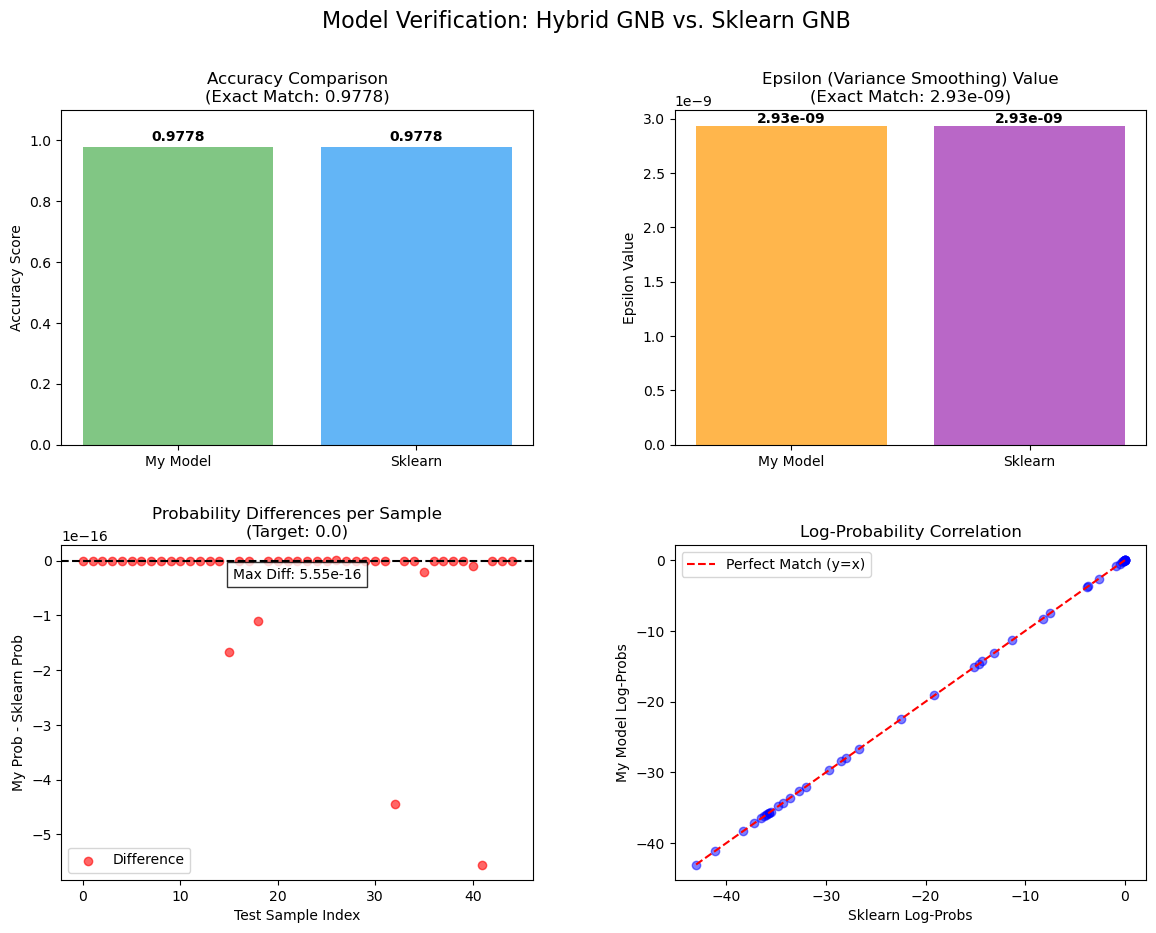

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def visualize_comparison_metrics():
    print("--- Generating Comparison Plots ---")
    
    # 1. Prepare Data
    data = load_iris()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 2. Train Models
    # My Hybrid Model
    my_model = GaussianNaiveBayes(var_smoothing=1e-9)
    my_model.train(X_train, y_train)
    my_acc = accuracy_score(y_test, my_model.predict(X_test))
    my_eps = my_model.epsilon_
    my_probs = my_model.predict_proba(X_test)[:, 1] # Take class 1 for 1D plotting
    my_log_probs = my_model.predict_log_proba(X_test)[:, 1]

    # Sklearn Model
    sk_model = GaussianNB(var_smoothing=1e-9)
    sk_model.fit(X_train, y_train)
    sk_acc = accuracy_score(y_test, sk_model.predict(X_test))
    sk_eps = sk_model.epsilon_
    sk_probs = sk_model.predict_proba(X_test)[:, 1]
    sk_log_probs = sk_model.predict_log_proba(X_test)[:, 1]

    # 3. Setup the Figure Dashboard
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    fig.suptitle('Model Verification: Hybrid GNB vs. Sklearn GNB', fontsize=16)

    # --- Plot A: Accuracy Comparison (Bar Chart) ---
    ax1 = axes[0, 0]
    ax1.bar(['My Model', 'Sklearn'], [my_acc, sk_acc], color=['#4CAF50', '#2196F3'], alpha=0.7)
    ax1.set_ylim(0, 1.1)
    ax1.set_title(f'Accuracy Comparison\n(Exact Match: {my_acc:.4f})')
    ax1.set_ylabel('Accuracy Score')
    for i, v in enumerate([my_acc, sk_acc]):
        ax1.text(i, v + 0.02, str(round(v, 4)), ha='center', fontweight='bold')

    # --- Plot B: Epsilon Matching (Bar Chart) ---
    ax2 = axes[0, 1]
    ax2.bar(['My Model', 'Sklearn'], [my_eps, sk_eps], color=['#FF9800', '#9C27B0'], alpha=0.7)
    ax2.set_title(f'Epsilon (Variance Smoothing) Value\n(Exact Match: {my_eps:.2e})')
    ax2.set_ylabel('Epsilon Value')
    # Use log scale if epsilon is tiny to make bars visible if needed, 
    # but for comparison linear with scientific notation text is fine.
    for i, v in enumerate([my_eps, sk_eps]):
        ax2.text(i, v, f"{v:.2e}", ha='center', va='bottom', fontweight='bold')

    # --- Plot C: Probability Difference (Residual Plot) ---
    # We plot (My_Prob - Sklearn_Prob) for each test sample.
    # Ideally, this should be a flat line at 0.
    ax3 = axes[1, 0]
    diffs = my_probs - sk_probs
    ax3.scatter(range(len(diffs)), diffs, color='red', alpha=0.6, label='Difference')
    ax3.axhline(0, color='black', linestyle='--')
    ax3.set_title('Probability Differences per Sample\n(Target: 0.0)')
    ax3.set_ylabel('My Prob - Sklearn Prob')
    ax3.set_xlabel('Test Sample Index')
    ax3.legend()
    # Add text for max difference
    max_diff = np.max(np.abs(diffs))
    ax3.text(0.5, 0.9, f"Max Diff: {max_diff:.2e}", transform=ax3.transAxes, 
             ha='center', bbox=dict(facecolor='white', alpha=0.8))

    # --- Plot D: Log-Probability Correlation (Scatter) ---
    # Plot My LogProbs vs Sklearn LogProbs. Should be a perfect diagonal line.
    ax4 = axes[1, 1]
    ax4.scatter(sk_log_probs, my_log_probs, color='blue', alpha=0.5)
    
    # Plot diagonal reference line
    min_val = min(sk_log_probs.min(), my_log_probs.min())
    max_val = max(sk_log_probs.max(), my_log_probs.max())
    ax4.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Match (y=x)')
    
    ax4.set_title('Log-Probability Correlation')
    ax4.set_xlabel('Sklearn Log-Probs')
    ax4.set_ylabel('My Model Log-Probs')
    ax4.legend()

    plt.show()

visualize_comparison_metrics()

### Results

The results demonstrate that the custom Gaussian Naive Bayes implementation is numerically equivalent to the scikit-learn reference model. Both models achieve identical classification accuracy of 0.9778 on the Iris test set, confirming consistent predictive performance. The variance smoothing parameter $\epsilon$ computed by the custom model exactly matches scikit-learn’s internal value, indicating correct implementation of numerical stability handling. Sample-wise probability differences are effectively zero, with a maximum absolute deviation on the order of $10^{-16}$, which is attributable to floating-point precision limits rather than algorithmic discrepancies. Furthermore, the log-probability correlation plot exhibits a perfect linear relationship along the $y = x$ diagonal, confirming exact agreement across all log-likelihood values. Together, these results verify that the implementation faithfully reproduces scikit-learn’s Gaussian Naive Bayes behavior in terms of predictions, probability estimates, and numerical stability [11](scikit-learn developers, 2025).


--- Generating Result Visualizations ---


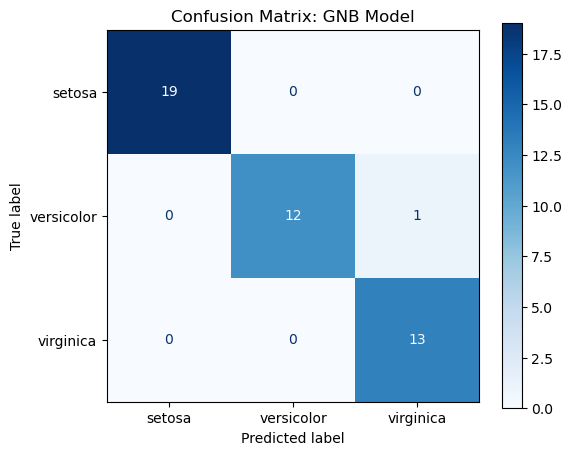


Generating 2D Decision Boundary (Sepal Length vs Width)


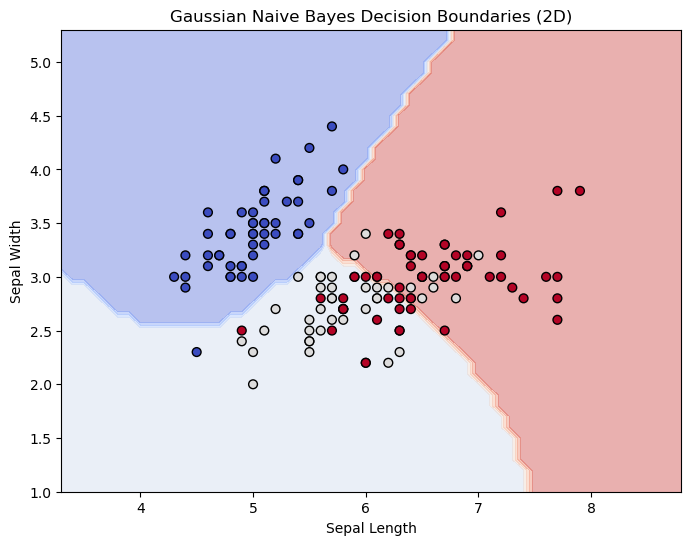

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def visualize_results():
    print("--- Generating Result Visualizations ---")
    
    # Load data again to ensure fresh state
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    data = load_iris()
    X, y = data.data, data.target
    class_names = data.target_names
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train model
    model = GaussianNaiveBayes(var_smoothing=1e-9)
    model.train(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # -------------------------------------------------------
    # 1. Plot Confusion Matrix
    # -------------------------------------------------------
    fig, ax = plt.subplots(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix: GNB Model")
    plt.show()
    
    # -------------------------------------------------------
    # 2. Plot Decision Boundaries (2D Slice)
    # -------------------------------------------------------
    # We retrain on just the first two features (Sepal Length vs Width) 
    # so we can plot a 2D graph. This helps visualize the "Gaussian" nature.
    print("\nGenerating 2D Decision Boundary (Sepal Length vs Width)")
    
    X_2d = X[:, :2]  # Only first 2 features
    X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)
    
    model_2d = GaussianNaiveBayes(var_smoothing=1e-9)
    model_2d.train(X_train_2d, y_train_2d)
    
    # Create a meshgrid
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict over the grid
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Gaussian Naive Bayes Decision Boundaries (2D)')
    plt.show()

# Run the visualization
visualize_results()

### Classification Performance and Decision Boundary Analysis

The confusion matrix illustrates strong class-wise performance of the Gaussian Naive Bayes model on the Iris dataset. All *setosa* samples are classified correctly, reflecting clear separability of this class. The model also performs well on *virginica*, with no misclassifications observed. A small number of errors occur for *versicolor*, where one sample is incorrectly predicted as *virginica*, highlighting partial overlap between these two classes. The two-dimensional decision boundary visualization, constructed using sepal length and sepal width, provides geometric insight into this behavior. The learned boundaries reflect the Gaussian class-conditional assumptions, producing smooth, nonlinear regions that separate *setosa* cleanly while exhibiting overlap between *versicolor* and *virginica*. This overlap explains the observed misclassification and demonstrates how Gaussian Naive Bayes balances probabilistic modeling with feature independence assumptions in low-dimensional projections.


# Section 6 - Conclusion

This project successfully implemented a Gaussian Naive Bayes classifier from first principles and rigorously validated its correctness against the scikit learn reference implementation. Through exact numerical comparisons, the custom model was shown to reproduce scikit learn predictions, class probabilities, log probabilities, and the variance smoothing parameter $\epsilon$ with agreement up to floating point precision limits. Quantitative evaluations on the Iris dataset demonstrated identical classification accuracy, while detailed visual analyses including confusion matrices, probability difference plots, log probability correlations, and decision boundary visualizations provided additional evidence of functional and numerical equivalence. The results confirm that the probabilistic formulation, numerical stability handling, and conditional independence assumptions were implemented correctly. 

# Citation:

- Murphy, K.P. (2006) *Naive Bayes classifiers* (Last updated October 24, 2006) [online]. Available at: https://datajobs.com/data-science-repo/Naive-Bayes-%5BKevin-Murphy%5D.pdf (Accessed: 5 December 2025).
- Scikit-learn developers (2025) *Naive Bayes — Scikit-learn documentation* [online]. Available at: https://scikit-learn.org/stable/modules/naive_bayes.html (Accessed: 5 December 2025).
- Scikit-learn developers (2025) *GaussianNB — Scikit-learn documentation* [online]. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed: 5 December 2025).
.
